# MOVIE GENRE CLASSIFICATION

Importing Libraries


In [3]:
import nltk
import string
import re

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

# Data Collection and Processing

**About**
IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

As of December 2020, IMDb has approximately 7.5 million titles (including episodes) and 10.4 million personalities in its database,[2] as well as 83 million registered users.

IMDb began as a movie database on the Usenet group "rec.arts.movies" in 1990 and moved to the web in 1993.

* **No. of Attributes: 4**
* **No. of Instances: 54214**

In [4]:
# Training Data
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=':::', names=['Movie_title', 'Genre', 'Description'], engine='python') 

In [5]:
train_data.describe()

,Movie_title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
train_data.shape

(54214, 3)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_title  54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
train_data.head(10)

,Movie_title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [9]:
train_data.isnull().sum()

Movie_title    0
Genre          0
Description    0
dtype: int64

In [10]:
# Test data

test_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Movie_title', 'Description'], engine='python')
test_data.head()

,Id,Movie_title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


# Exploratory Data Analysis (EDA) & Data Visualization

Text(0.5, 1.0, 'Genre Distribution')

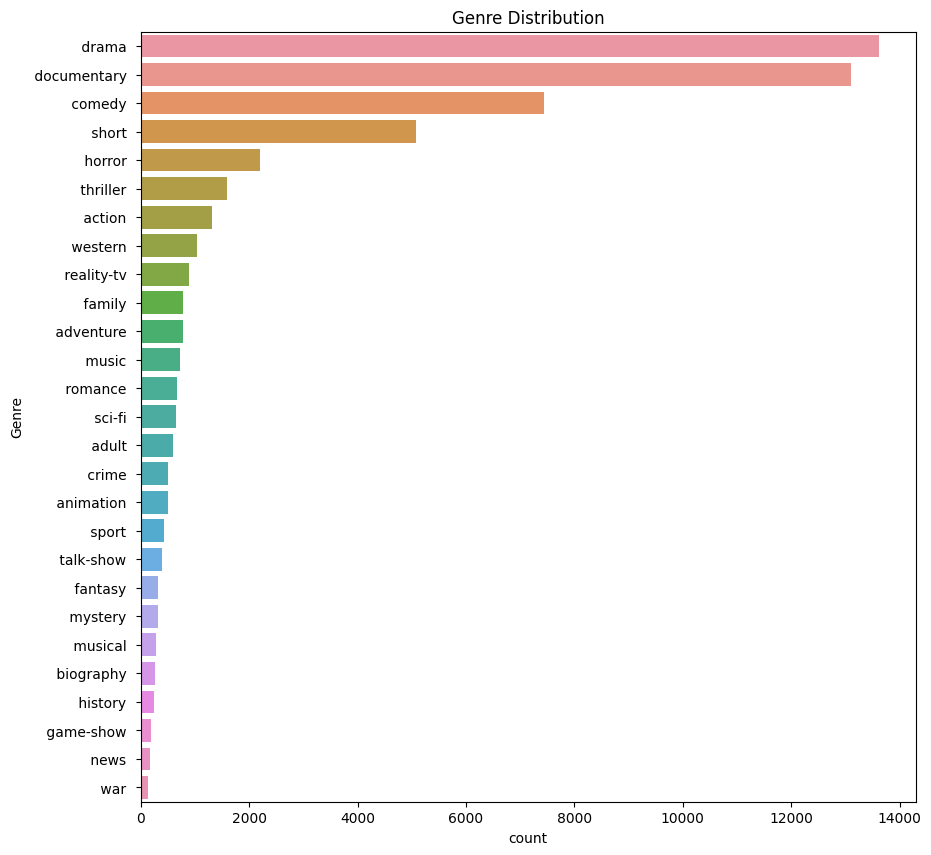

In [11]:
# distribution of genres in training data
plt.figure(figsize=(10,10))
sns.countplot(data=train_data,order= train_data["Genre"].value_counts().index,y="Genre")
plt.title("Genre Distribution")

# Data Preprocessing and Text Cleaning

In [12]:
stemmer = LancasterStemmer()
stop_words=stopwords.words("english")

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles and email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text) #tokenize text
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove multiple spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['New_text'] = train_data['Description'].apply(clean_text)
test_data['New_text'] = test_data['Description'].apply(clean_text)

In [13]:
# # Calculate the length of cleaned text
# train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# # Visualize the distribution of text lengths
# plt.figure(figsize=(8, 7))
# sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
# plt.xlabel('Length', fontsize=14, fontweight='bold')
# plt.ylabel('Frequency', fontsize=14, fontweight='bold')
# plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
# plt.show()

In [14]:
test_data.head()

,Id,Movie_title,Description,New_text
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


Text Vectorization Using TF-IDF

In [15]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['New_text'])
X_test = tfidf.transform(test_data['New_text'])

Data Splitting for training and validation

In [16]:
# training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training & Evaluation

Multinomial Naive Bayes classifier

In [17]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = nb.predict(X_val) # on validation set

In [19]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4470165083463986


In [20]:
print(classification_report(y_val, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       248
       adult        0.00      0.00      0.00       110
   adventure        0.00      0.00      0.00       150
   animation        0.00      0.00      0.00       107
   biography        0.00      0.00      0.00        52
      comedy        0.72      0.04      0.08      1497
       crime        0.00      0.00      0.00        90
 documentary        0.53      0.90      0.67      2586
       drama        0.39      0.88      0.54      2773
      family        0.00      0.00      0.00       164
     fantasy        0.00      0.00      0.00        67
   game-show        0.00      0.00      0.00        33
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       424
       music        0.00      0.00      0.00       163
     musical        0.00      0.00      0.00        56
     mystery        0.00      0.00      0.00        55
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Classifier

In [21]:
# svc = SVC() 
# svc.fit(X_train, y_train)      

In [22]:
# y_pred = svc.predict(X_val) # on validation set

In [23]:
# svc.score(X_train, y_train) 

In [24]:
# print(classification_report(y_val, y_pred))

# Predictions on Test Dataset

In [25]:
# Use the trained model to make predictions on the test data
X_test_predictions = nb.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [26]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                       Movie_title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    